In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from scipy.stats import zscore

In [4]:
df = pd.read_csv('cars-dataset.csv')

In [5]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [6]:
df.info()
print('hp column is of type object where as it should be either float or int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB
hp column is of type object where as it should be either float or int


In [7]:
df.describe()
print('On a high level looks like there is no null value and outliers')

On a high level looks like there is no null value and outliers


In [8]:
print(df.hp.unique())
print('we can see a question mark in the column hp')
df.hp[df.hp=='?'] = '0'
print(df.hp.unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']
we can see a question mark in the column hp
['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '0' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '

C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df['hp'] = pd.to_numeric(df['hp'])

In [10]:
df.info()
print('hp column coverted to numeric')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB
hp column coverted to numeric


So there is no null value


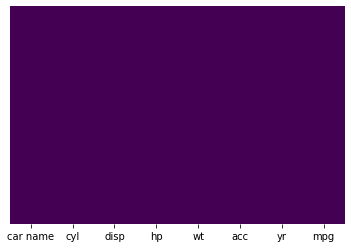

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print('So there is no null value')

In [12]:
print('lets drop the carname column since we don''t need it')
df_without_cars = df.drop('car name',axis=1)

lets drop the carname column since we dont need it


In [13]:
print('lets standardize the data first')
df_without_cars = df_without_cars.apply(zscore)

lets standardize the data first


In [14]:
print('this is the scales dataframe')
df_without_cars.head()

this is the scales dataframe


,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.834543


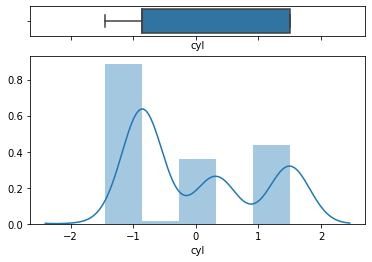

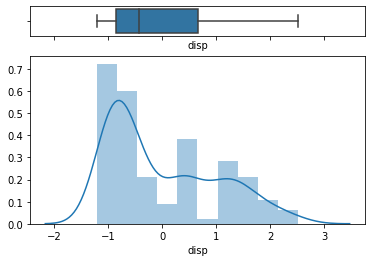

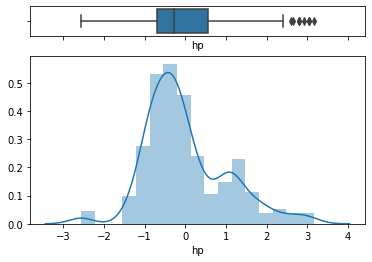

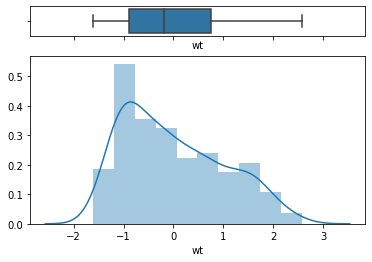

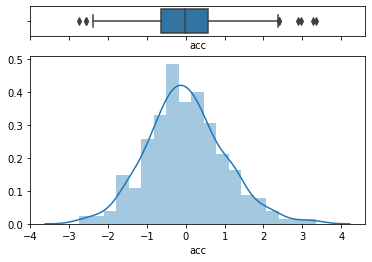

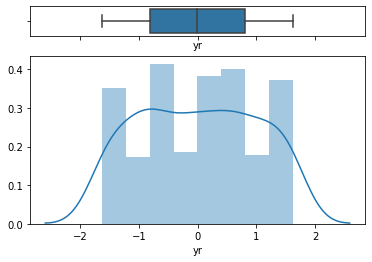

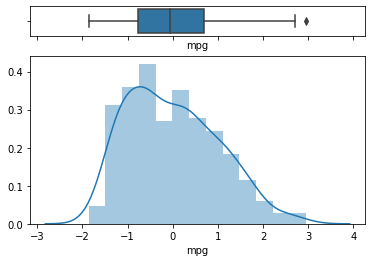

In [15]:
for feature in df_without_cars.columns: # Loop through all columns in the dataframe
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df_without_cars[feature], ax=ax_box)
    sns.distplot(df_without_cars[feature], ax=ax_hist)

In [16]:
print('hp acc and mpg has outliers')

hp acc and mpg has outliers


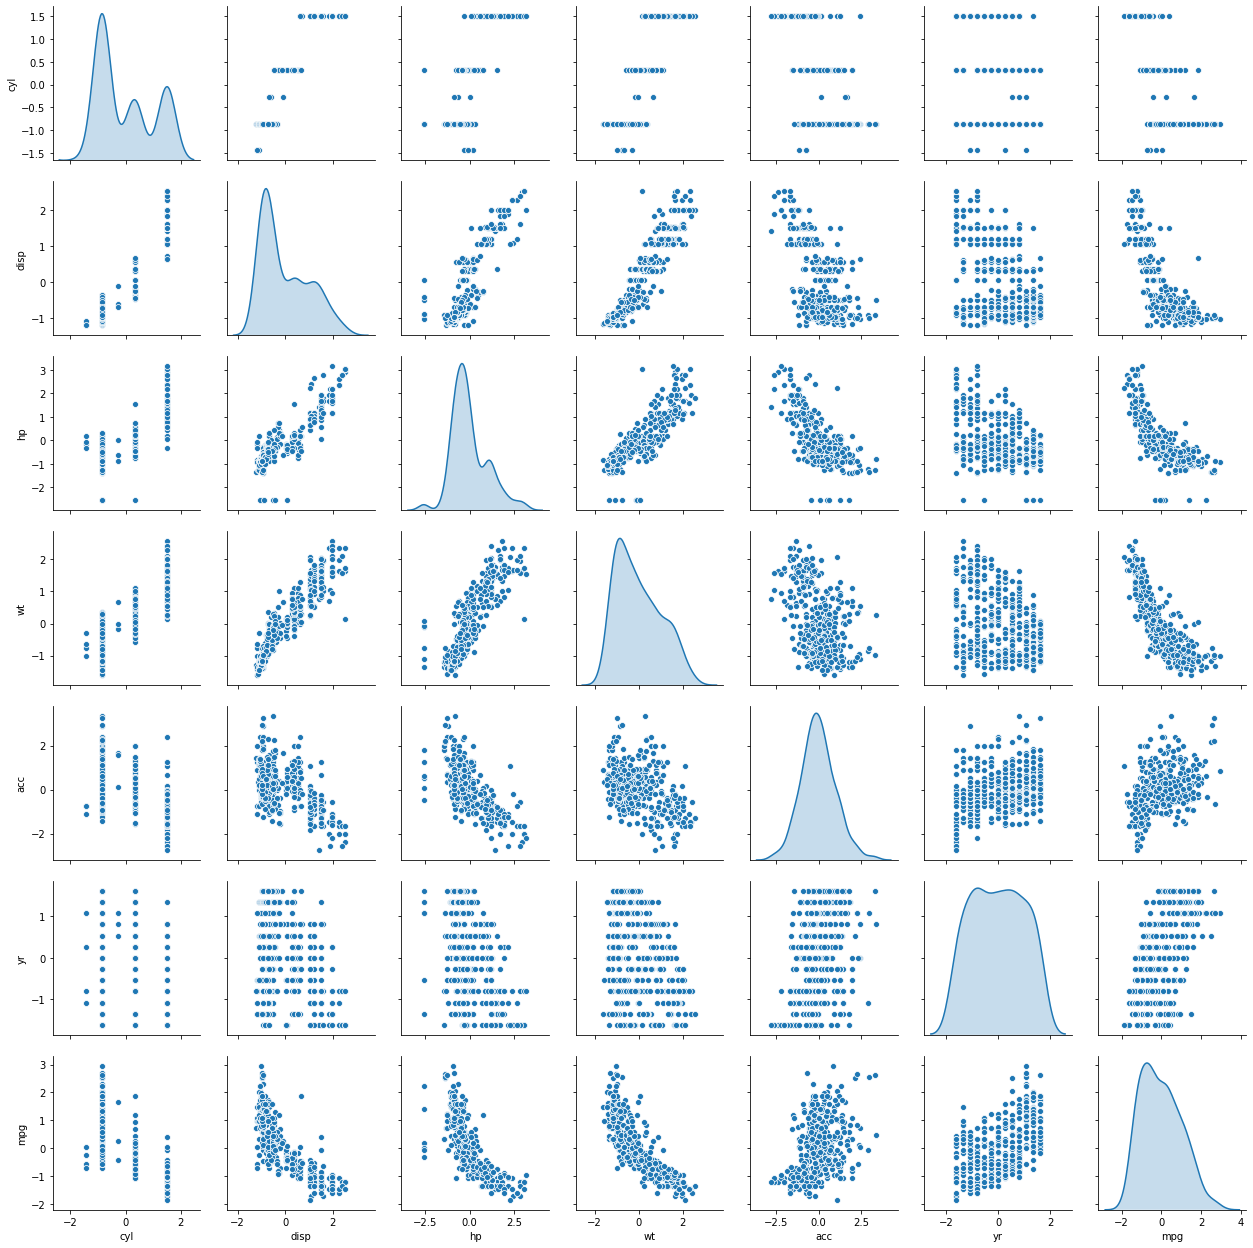

In [17]:
sns.pairplot(df_without_cars,diag_kind='kde')

In [18]:
print('looks like there are 2 and 3 gaussian on most of the column, hence cluster may range from 3 to 6')

looks like there are 2 and 3 gaussian on most of the column, hence cluster may range from 3 to 6


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

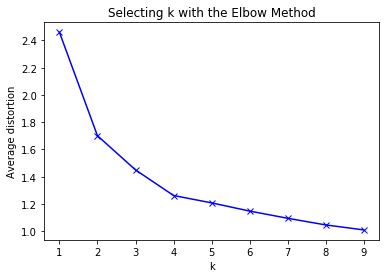

In [19]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_without_cars)
    prediction=model.predict(df_without_cars)
    meanDistortions.append(sum(np.min(cdist(df_without_cars, model.cluster_centers_, 'euclidean'), axis=1)) / df_without_cars.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

print('looks like there are 4 clusters')

In [20]:
final_model=KMeans(4)
final_model.fit(df_without_cars)
prediction=final_model.predict(df_without_cars)

#Append the prediction 
df_without_cars["GROUP"] = prediction
df_without_cars['carname'] = df['car name']
print("Groups Assigned : \n")
df_without_cars[["carname", "GROUP"]]

Groups Assigned : 



,carname,GROUP
0,chevrolet chevelle malibu,3
1,buick skylark 320,3
2,plymouth satellite,3
3,amc rebel sst,3
4,ford torino,3
5,ford galaxie 500,3
6,chevrolet impala,3
7,plymouth fury iii,3
8,pontiac catalina,3
9,amc ambassador dpl,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000064CC49DFD0>,
      dtype=object)

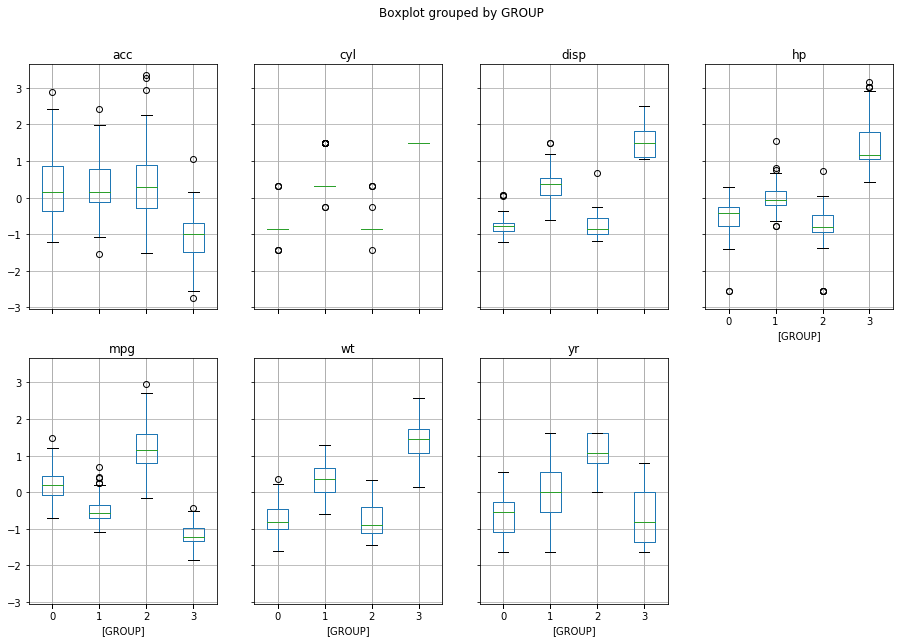

In [21]:
df_without_cars.boxplot(by='GROUP', layout=(2,4), figsize=(15,10))

In [22]:
print('although elbow method is showing that k=4 is the best number of cluster, still we can see a lot of outliers which are not part of cluster')

although elbow method is showing that k=4 is the best number of cluster, still we can see a lot of outliers which are not part of cluster


In [23]:
print('try with the Hierarchial clustering')

try with the Hierarchial clustering


In [25]:
df_without_cars_new = df_without_cars.drop(['GROUP','carname'],axis=1)
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')
model.fit(df_without_cars_new)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [26]:
df_without_cars_new['labels'] = model.labels_

In [27]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [29]:
Z = linkage(df_without_cars_new, 'average')
c, coph_dists = cophenet(Z , pdist(df_without_cars_new))

c

0.8430921392243254

In [30]:
Z.shape

Z[1]
Z[1:10]

array([[3.53000000e+02, 3.55000000e+02, 1.21903595e-01, 2.00000000e+00],
       [3.49000000e+02, 3.51000000e+02, 1.47867428e-01, 2.00000000e+00],
       [2.34000000e+02, 2.36000000e+02, 1.83776404e-01, 2.00000000e+00],
       [6.80000000e+01, 6.90000000e+01, 1.86611968e-01, 2.00000000e+00],
       [1.29000000e+02, 1.45000000e+02, 2.09925003e-01, 2.00000000e+00],
       [3.50000000e+01, 3.70000000e+01, 2.20536632e-01, 2.00000000e+00],
       [6.40000000e+01, 7.50000000e+01, 2.32529276e-01, 2.00000000e+00],
       [1.40000000e+01, 2.10000000e+01, 2.37558698e-01, 2.00000000e+00],
       [2.85000000e+02, 2.88000000e+02, 2.45118131e-01, 2.00000000e+00]])

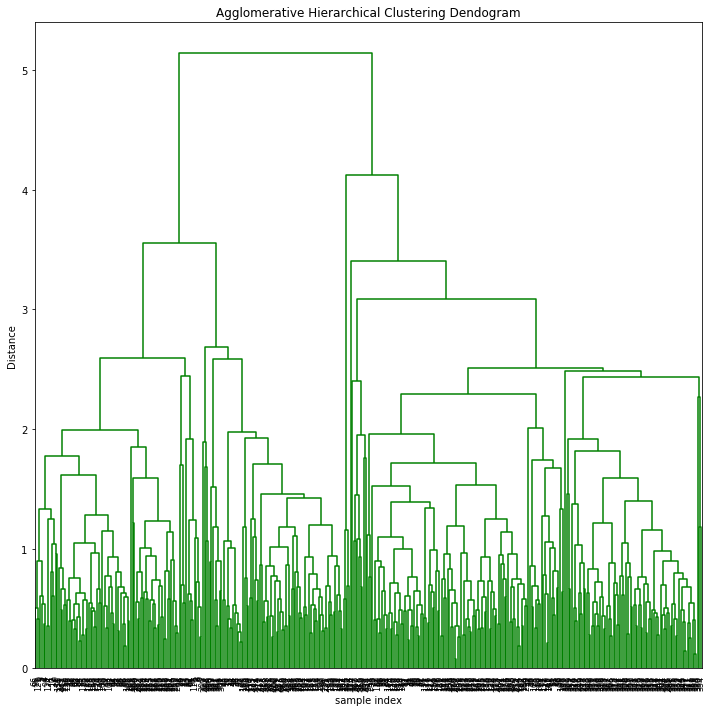

In [31]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

In [35]:
print('lets find the coefficient of Linear regression model on the different groups')
df_without_cars

lets find the coefficient of Linear regression model on the different groups


,cyl,disp,hp,wt,acc,yr,mpg,GROUP,carname
0,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.706439,3,chevrolet chevelle malibu
1,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-1.090751,3,buick skylark 320
2,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.706439,3,plymouth satellite
3,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.962647,3,amc rebel sst
4,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.834543,3,ford torino
5,1.498191,2.262118,2.364696,1.620492,-2.021656,-1.627426,-1.090751,3,ford galaxie 500
6,1.498191,2.502182,2.911702,1.635863,-2.384735,-1.627426,-1.218855,3,chevrolet impala
7,1.498191,2.367746,2.787383,1.586204,-2.566274,-1.627426,-1.218855,3,plymouth fury iii
8,1.498191,2.511784,3.036022,1.719809,-2.021656,-1.627426,-1.218855,3,pontiac catalina
9,1.498191,1.887617,2.165785,1.039961,-2.566274,-1.627426,-1.090751,3,amc ambassador dpl


In [37]:
from sklearn.linear_model import LinearRegression
y_train=df_without_cars['GROUP']
X_train=df_without_cars.drop(['carname','GROUP'],axis=1)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
cyl,0.411753
disp,0.382343
hp,0.159973
wt,0.402420
acc,-0.184652
yr,0.242303
mpg,0.757856
